

# Linear Model (Workbook)



<br/>
<br/><br/><br/>
### ITCS6156/8156 Spring 2018
### Minwoo "Jake" Lee

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook
import pandas as pd

## Reading and applying linear models

In [2]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv -o forestfires.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 25478    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 25478  100 25478    0     0  25478      0  0:00:01  0:00:01 --:--:-- 24357


In [3]:
# Can I see the map image by using the map? 
df = pd.read_csv("forestfires.csv")

In [4]:
x, y = np.meshgrid(np.arange(7), np.arange(10))
x

array([[0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6]])

In [5]:
y

array([[0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9]])

In [20]:
df.loc[df.loc[:, ['X', 'Y', 'area']]

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [12]:
burned = df.loc[df.loc[:, 'area'] > 0, ['X', 'Y', 'area']]

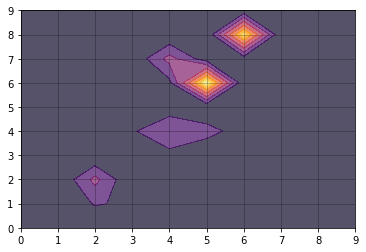

In [28]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#ax.scatter(df.loc[:, 'X'], df.loc[:, 'Y'], df.loc[:, 'area'], marker='^')
xs, ys = np.meshgrid(range(10), range(10))
xs

zs = np.zeros(xs.shape)
for i, row  in burned.iterrows():
    x, y = int(row['X']), int(row['Y'])
    #print (x,y)
    #if zs[x, y] > 0:
    #    print(x, y, ":duplicate entries!")
    zs[x, y] += row['area']
    
plt.contourf(xs,ys,zs, alpha=0.7, cmap=plt.cm.inferno)
plt.grid(c='k', ls='-', alpha=0.3)

#plt.show()

In [29]:
pd.DataFrame(zs)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
1,0.0,0.0,219.94,157.14,150.28,115.47,0.00,0.0,0.00,0.00
2,0.0,0.0,462.65,0.00,143.37,92.63,0.00,0.0,0.00,0.00
3,0.0,0.0,0.00,6.58,126.35,2.18,0.00,0.0,0.00,0.00
4,0.0,0.0,0.00,172.88,397.43,287.01,87.73,0.0,0.00,0.00
5,0.0,0.0,0.00,0.00,73.75,0.00,17.62,0.0,0.00,0.00
6,0.0,0.0,0.00,192.78,144.47,1384.05,8.59,0.0,0.00,0.00
7,0.0,0.0,0.00,27.35,474.37,77.39,86.45,0.0,0.00,0.00
8,0.0,0.0,0.00,26.31,12.18,2.93,1265.30,0.0,185.76,0.00
9,0.0,0.0,0.00,0.00,185.61,8.16,42.87,0.0,0.00,4.47


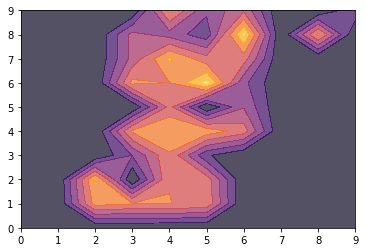

In [30]:
plt.contourf(xs, ys, np.log(zs + 1), alpha=0.7, cmap=plt.cm.inferno)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000159BCC6B6D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000159BBA334A8>]], dtype=object)

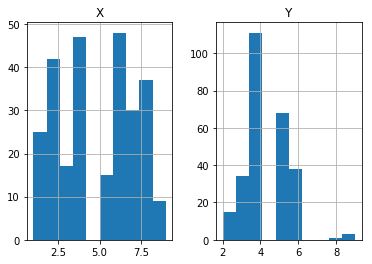

In [31]:
burned.loc[:, ['X', 'Y']].hist()

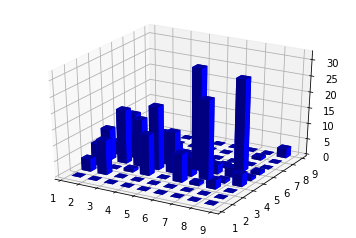

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(burned.loc[:, 'X'], burned.loc[:, 'Y'], bins=9, range=[[1, 9], [1, 9]])

# Construct arrays for the anchor positions of the 16 bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

In [33]:
X = df.iloc[:, :-1]
T = df.iloc[:, -1].as_matrix()
N = df.shape[0]

# forgot conversion of string
monthdic = {'jan': 1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 
            'jul': 7, 'aug':8, 'sep':9, 'oct':10, 'nov': 11, 'dec': 12}
daydic = {'mon': 1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7 }

X['month'] = X['month'].apply(lambda x: monthdic[x])
X['day'] = X['day'].apply(lambda x: daydic[x])
X = X.as_matrix()

Tlog = np.log(T + 1)

In [38]:
# adding basis
X1 = np.hstack((np.ones((N,1)), X))
X1

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [39]:
w = np.linalg.lstsq(X1.T @ X1, X1.T @ Tlog)[0]

In [40]:
w

array([-0.30477203,  0.0425947 , -0.00129011,  0.1550639 ,  0.00862479,
        0.00502995,  0.00240059, -0.00119776, -0.02492829,  0.00730238,
       -0.00418998,  0.05759247,  0.08504343])

In [41]:
Y = X1 @ w

In [42]:
# RMSE 

E = Tlog-Y
E

array([ -9.83710145e-01,  -1.17337675e+00,  -1.20468948e+00,
        -6.62126038e-01,  -5.36517929e-01,  -1.39881263e+00,
        -1.39095028e+00,  -9.16238885e-01,  -1.34829409e+00,
        -1.32630278e+00,  -1.42799699e+00,  -8.71468247e-01,
        -1.10886089e+00,  -1.21894482e+00,  -1.44973973e+00,
        -1.28358032e+00,  -9.82795114e-01,  -1.43146508e+00,
        -9.10328725e-01,  -1.01678326e+00,  -1.24452716e+00,
        -9.96311947e-01,  -2.74615833e-01,  -1.49844740e+00,
        -1.24070091e+00,  -1.28475110e+00,  -1.40081735e+00,
        -1.17198201e+00,  -1.42257899e+00,  -1.36739108e+00,
        -1.13092152e+00,  -1.18254112e+00,  -1.10650226e+00,
        -1.16398686e+00,  -1.08067163e+00,  -1.10831797e+00,
        -1.40413367e+00,  -1.24196105e+00,  -1.40998675e+00,
        -7.50319555e-01,  -1.22554067e+00,  -1.21377324e+00,
        -8.62136405e-01,  -1.06805114e+00,  -9.64698295e-01,
        -1.09389509e+00,  -1.09017434e+00,  -1.05145719e+00,
        -6.93732900e-01,

In [43]:
(Tlog - Y)**2

array([  9.67685650e-01,   1.37681301e+00,   1.45127674e+00,
         4.38410891e-01,   2.87851488e-01,   1.95667677e+00,
         1.93474268e+00,   8.39493694e-01,   1.81789696e+00,
         1.75907907e+00,   2.03917541e+00,   7.59456906e-01,
         1.22957247e+00,   1.48582648e+00,   2.10174529e+00,
         1.64757843e+00,   9.65886236e-01,   2.04909227e+00,
         8.28698388e-01,   1.03384819e+00,   1.54884786e+00,
         9.92637497e-01,   7.54138556e-02,   2.24534462e+00,
         1.53933874e+00,   1.65058538e+00,   1.96228925e+00,
         1.37354184e+00,   2.02373099e+00,   1.86975837e+00,
         1.27898348e+00,   1.39840350e+00,   1.22434724e+00,
         1.35486542e+00,   1.16785118e+00,   1.22836872e+00,
         1.97159137e+00,   1.54246724e+00,   1.98806263e+00,
         5.62979435e-01,   1.50194994e+00,   1.47324548e+00,
         7.43279181e-01,   1.14073325e+00,   9.30642801e-01,
         1.19660646e+00,   1.18848008e+00,   1.10556222e+00,
         4.81265336e-01,

In [44]:
np.mean((Tlog - Y)**2)

1.8780043477613277

In [45]:
np.sqrt(np.mean((Tlog - Y)**2))

1.3704029873585828

In [46]:
pd.DataFrame(T).describe()

,0
count,517.000000
mean,12.847292
std,63.655818
min,0.000000
25%,0.000000
50%,0.520000
75%,6.570000
max,1090.840000


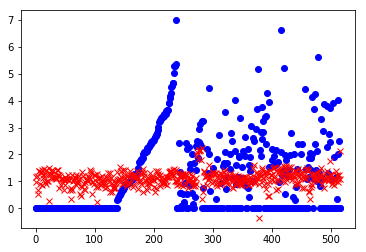

In [47]:
plt.plot(Tlog, 'ob')
plt.plot(Y, 'xr')

In [48]:
w

array([-0.30477203,  0.0425947 , -0.00129011,  0.1550639 ,  0.00862479,
        0.00502995,  0.00240059, -0.00119776, -0.02492829,  0.00730238,
       -0.00418998,  0.05759247,  0.08504343])

# How to Improve the Fit? 

- Normalizaiton (Standardization) 

In [ ]:
pd.DataFrame(X).describe()

In [ ]:
mu = np.mean(X, axis=0)
std = np.std(X, axis=0)

In [ ]:
normX = (X - mu) / std
pd.DataFrame(normX).describe()

In [ ]:
dfX = pd.DataFrame(X)
mu = dfX.mean() 
std = dfX.std()

In [ ]:
ndfX = (dfX - mu) / std

In [ ]:
ndfX

In [ ]:
ndfX.describe()

In [ ]:
X1s = np.hstack((np.ones((N, 1)), ndfX.as_matrix())) 

In [ ]:
w_s = np.linalg.lstsq(X1s.T @ X1s, X1s.T @ Tlog)[0]

In [ ]:
Ys = X1s @ w_s

In [ ]:
plt.plot(Tlog, 'ob')
plt.plot(Ys, 'xr')

In [ ]:
w_s

In [ ]:
np.sqrt(np.sum((Tlog- Ys)**2))

# Does normalization help? 

- Normally
  - better results
  - more informative weights

- But, still the above results are poor! 
- what's next ?

In [ ]:
df.loc[:,'month']

In [ ]:
pd.get_dummies(df.loc[:, 'month'])

In [ ]:
pd.concat([pd.get_dummies(df.loc[:, 'month']), pd.get_dummies(df.loc[:, 'day'])], axis=1)

In [ ]:
df.columns.values

In [ ]:
X = pd.concat([
        df.iloc[:, :2], 
        pd.get_dummies(df.loc[:, 'month']), 
        pd.get_dummies(df.loc[:, 'day']),
        df.iloc[:, 4:-1]],
        axis=1)
X

In [ ]:
def normalize(X):
    mu = X.mean() 
    std = X.std()
    return (X - mu) / std

In [ ]:
nX = normalize(X)

In [ ]:
nX.shape

In [ ]:
nX.describe()

In [ ]:
X1i = np.hstack((np.ones((N, 1)), nX.as_matrix()))

In [ ]:
w_i = np.linalg.lstsq(X1i.T @ X1i, X1i.T @ Tlog)[0]

In [ ]:
Yi = X1i @ w_i

In [ ]:
np.sqrt(np.mean((Tlog- Yi)**2))

In [ ]:
plt.plot(Tlog)
plt.plot(Y)

# Helpful? What is next? 

- more flexible or sophistigated model!
- will comeback later in this semester. 

# Least Mean Squares 

Let us switch the gear and practice LMS, the online learning algorithm. 

In [ ]:
import IPython.display as ipd  # for display and clear_output


# read one by one and update weights 
alpha = 0.001 

w_lms = np.random.rand(X1i.shape[1])

fig = plt.figure(figsize=(16,8))

errs = []
for i in range(N):
    w_lms -= alpha * (w_lms.T @ X1i[i] - Tlog[i]) * X1i[i]
    
    Y_lms = X1i @ w_lms
    errs.append( np.sqrt(np.mean(Tlog - Y_lms)**2) )
    
    plt.clf()
    plt.subplot(1,2, 1)
    plt.plot(errs)
    plt.ylabel("RMSE")
    
    plt.subplot(1,2, 2)
    plt.plot(Tlog[:i])
    plt.plot(Y_lms[:i])
    plt.ylabel("Current Estimation")
    
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True)

In [ ]:
print("RMSE: {0}".format(errs[-1]))

# Partitioning Data 

- necessity to consider generalization of your model
- measure for the performance with unseen data


- training and testing partition

In [ ]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts



In [ ]:
Xlst, Tlst = partition(pd.DataFrame(X1i), pd.DataFrame(Tlog))

In [ ]:
Xlst[0].shape

In [ ]:
Xlst[1].shape

In [ ]:
Tlst[0].shape

In [ ]:
# read one by one and update weights 
alpha = 0.001 

Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ttrain, Ttest = [tt.as_matrix() for tt in Tlst]
 
w = np.random.rand(Xtrain.shape[1], Ttrain.shape[1])

fig = plt.figure(figsize=(16,8))

errs = []
for i in range(Xtrain.shape[0]):
    w -= alpha * ((w.T @ Xtrain[i] - Ttrain[i]) * Xtrain[i, None].T)
    
Yp = Xtest @ w
np.sqrt(np.mean((Yp -  Ttest)**2))

In [ ]:

plt.plot(Ttest)
plt.plot(Yp)

In [ ]:
# now with linear regression
w = np.linalg.lstsq(Xtrain.T @ Xtrain, Xtrain.T @ Ttrain)[0]

Yp2 = Xtest @ w
np.sqrt(np.mean((Yp2 -  Ttest)**2))

In [ ]:
plt.plot(Ttest)
plt.plot(Yp2)
